# 2D人体关键点 预训练模型预测-Python API

参考文档：https://github.com/open-mmlab/mmpose/blob/master/demo/docs/2d_human_pose_demo.md

作者：同济子豪兄 2022-06-06

如果报错`CUDA out of memory.`则重启前面几个代码的`kernel`即可。

## 进入 MMPose 主目录

In [1]:
import os
os.chdir('mmpose')
os.listdir()

['.git',
 '.circleci',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmpose',
 'model-index.yml',
 'pytest.ini',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmpose.egg-info',
 'checkpoints',
 'outputs',
 'data']

## 导入工具包

In [2]:
import cv2
from mmpose.apis import inference_top_down_pose_model, init_pose_model, vis_pose_result, process_mmdet_results
from mmdet.apis import inference_detector, init_detector

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

## 指定模型`config`配置文件和`checkpoint`权重文件

In [3]:
# 目标检测模型
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 人体姿态估计模型
pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'


## 初始化模型

In [4]:
# 目标检测模型
det_model = init_detector(det_config, det_checkpoint)

# 人体姿态估计模型
pose_model = init_pose_model(pose_config, pose_checkpoint)


load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


## 载入待预测图像

In [7]:
# img_path = 'data/TongjiDancer.png'
img_path = 'tests/data/coco/000000196141.jpg'

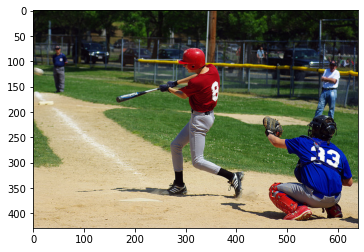

In [8]:
show_img_from_path(img_path)

## 运行目标检测预测

In [9]:
mmdet_results = inference_detector(det_model, img_path)

包含了MS COCO目标检测数据集 80 个类别每个预测框的以下信息：

左上角X坐标、左上角Y坐标、右下角X坐标、右下角Y坐标、置信度

In [10]:
len(mmdet_results)

80

In [11]:
# 行人
mmdet_results[0].shape

(12, 5)

In [12]:
# 自行车
mmdet_results[1].shape

(0, 5)

## 提取人体检测框

In [13]:
# 提取类别 ID 为 1 的 行人 目标检测框
person_results = process_mmdet_results(mmdet_results, cat_id=1)

In [14]:
len(person_results)

12

In [15]:
person_results[0]

{'bbox': array([245.30177  ,  72.32867  , 411.1545   , 375.06223  ,   0.9992731],
       dtype=float32)}

## 运行`top_down`自顶向下的人体姿态估计算法

In [16]:
pose_results, returned_outputs = inference_top_down_pose_model(pose_model, img_path, person_results, bbox_thr=0.3, format='xyxy', dataset='TopDownCocoDataset')


In [17]:
pose_results

[{'bbox': array([245.30177  ,  72.32867  , 411.1545   , 375.06223  ,   0.9992731],
        dtype=float32),
  'keypoints': array([[300.14252   , 112.831085  ,   0.9459554 ],
         [303.09888   , 106.918335  ,   0.92248833],
         [300.14252   , 106.918335  ,   0.8630142 ],
         [314.92444   , 109.874725  ,   0.8818084 ],
         [329.70636   ,  98.049194  ,   0.76715827],
         [323.79358   , 142.39493   ,   0.85206985],
         [353.35742   , 115.787476  ,   0.8857777 ],
         [297.18616   , 169.00235   ,   0.9099355 ],
         [320.83722   , 130.5694    ,   0.8332305 ],
         [267.6223    , 157.17685   ,   0.92961293],
         [282.40424   , 142.39493   ,   0.8747072 ],
         [329.70636   , 213.34811   ,   0.8024974 ],
         [344.48822   , 207.43533   ,   0.73365295],
         [323.79358   , 296.1268    ,   0.893644  ],
         [282.40424   , 266.56296   ,   0.91729426],
         [394.74677   , 328.647     ,   0.8716947 ],
         [288.31696   , 343.4289

## 可视化人体姿态估计结果

In [19]:
vis_result = vis_pose_result(pose_model, img_path, pose_results, dataset='TopDownCocoDataset', show=False)

In [20]:
vis_result.shape

(429, 640, 3)

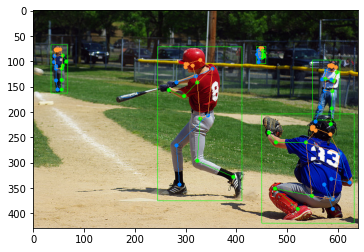

In [21]:
show_img_from_array(vis_result)

In [22]:
cv2.imwrite('outputs/B1.jpg', vis_result)

True